In [1]:
import random, os, re, json, sys
sys.path.append("../scripts/")
from helper import *
import numpy as np
from tqdm import tqdm
from collections import Counter, defaultdict, OrderedDict
from matplotlib import pyplot as plt
import fuckit

In [9]:
COLORS = ['b', 'forestgreen', 'brown', 'hotpink', 'orange',
          'DarkSeaGreen', 'DarkOrchid', 'DarkKhaki', 'DarkTurquoise', 'tomato'
          ]

In [29]:
dir = "../data/output_decoder_LM/chatgpt/regular/len/"
variable_to_em, variable_to_error_mag = defaultdict(lambda: defaultdict(list)), defaultdict(lambda: defaultdict(list))
count = 0

@fuckit
def extract_ans(output):
    ret = "failed"
    ret = int(output)
    ret = int(re.findall(r'([0-9]+)\.', output)[0])
    ret = int(re.findall(r'is ([0-9]+)', output)[0])
    ret = int(re.findall(r'([0-9]+) characters', output)[0])
    ret = int(re.findall(r'([0-9]+) digits', output)[0])
    if ret == "failed": print("Failed to locate answer span for: ", output)
    return ret

variable = "prompt_file"
fix = [
    ("input_file", "try.txt"),
    ("temperature", 0.0)
]
for f in os.listdir(dir):
    with open(os.path.join(dir, f), "r") as f:
        lines = f.readlines()
        header, lines = json.loads(lines[0].strip()), lines[1:]
        if not all([header[i] == j for i, j in fix]): continue
        label = "{} = {}".format(variable, header[variable])
        for line in lines:
            l = json.loads(line.strip())
            input, gth, output = l[0], l[1], l[2]
            output = extract_ans(output)
            if output == "failed": continue
            count += 1
            variable_to_em[label][len(input)].append(int(gth) == int(output))
            variable_to_error_mag[label][len(input)].append(np.abs(int(gth) - output))
variable_to_em = OrderedDict(sorted(variable_to_em.items()))
variable_to_error_mag = OrderedDict(sorted(variable_to_error_mag.items()))

print(count)

Failed to locate answer span for:  the number of characters in the string. 

To determine the length of the string, we count the number of characters in it. 

The length of the string "958981452048423035569045018821439875672643316464296586528093292685576519193603365852
5649


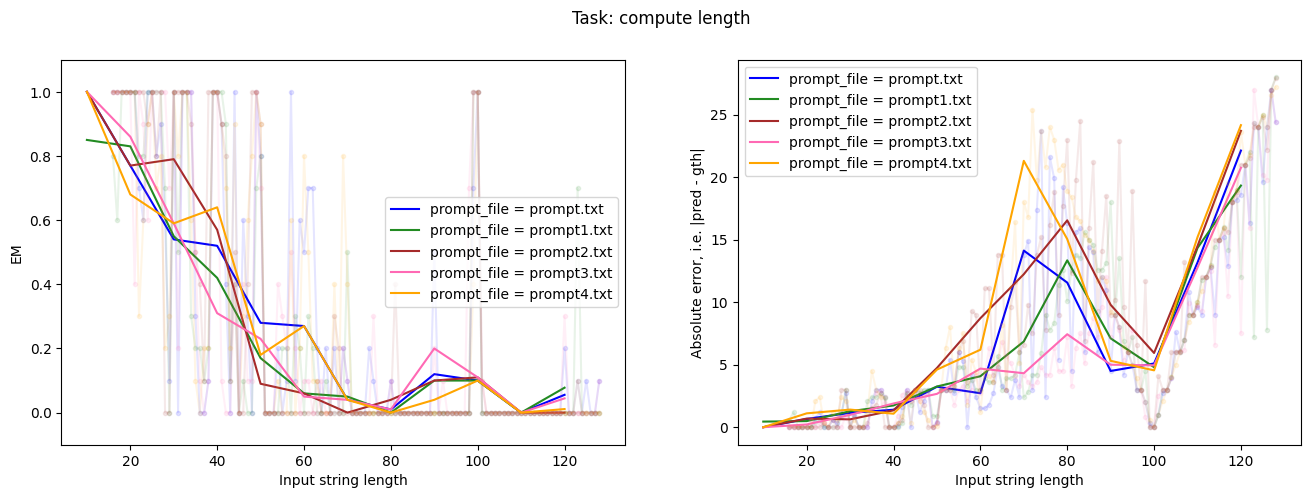

In [41]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
color_iter = iter(COLORS)
for label, input_len_to_em in variable_to_em.items():
    color = next(color_iter)
    X1 = sorted(input_len_to_em.keys())
    Y1 = [float(np.mean(input_len_to_em[x])) for x in X1]
    ax1.plot(X1, Y1, ".-", color=color, alpha=0.1)
    X1 = [x*10 for x in range(1, 26)]
    Y1 = [
            float(np.mean(
                [np.mean(input_len_to_em[k]) for k in input_len_to_em if x*10<=k<(1+x)*10]
            ))
            for x in range(1, 26)
    ]
    ax1.plot(X1, Y1, "-", color=color, label=label)
ax1.set_ylim((-0.1, 1.1))
ax1.set_ylabel("EM")
ax1.set_xlabel("Input string length")
ax1.legend()

ax2 = fig.add_subplot(122)
color_iter = iter(COLORS)
for label, input_len_to_error_mag in variable_to_error_mag.items():
    color = next(color_iter)
    X2 = sorted(input_len_to_error_mag.keys())
    Y2 = [float(np.mean(input_len_to_error_mag[x])) for x in X2]
    ax2.plot(X2, Y2, ".-", alpha=0.1, color=color)
    X2 = [x*10 for x in range(1, 26)]
    Y2 = [
            float(np.mean(
                [np.mean(input_len_to_error_mag[k]) for k in input_len_to_error_mag if x*10<=k<(1+x)*10]
            ))
            for x in range(1, 26)
    ]
    ax2.plot(X2, Y2, "-", color=color, label=label)
ax2.set_ylabel("Absolute error, i.e. |pred - gth|")
ax2.set_xlabel("Input string length")
ax2.legend()

fig.suptitle("Task: compute length")
plt.show()

In [3]:
dir = "../data/output_decoder_LM/chatgpt/regular/max/"
variable_to_em, variable_to_error_mag = defaultdict(lambda: defaultdict(list)), defaultdict(lambda: defaultdict(list))
count = 0

@fuckit
def extract_ans(output):
    ret = "failed"
    return int(output)
    return int(re.findall(r'([0-9]+)\.', output)[0])
    return int(re.findall(r'is ([0-9]+)', output)[0])
    return int(re.findall(r'([0-9]+) characters', output)[0])
    return int(re.findall(r'([0-9]+) digits', output)[0])
    if ret == "failed": print("Failed to locate answer span for: ", output)
    return ret

variable = "prompt_file"
fix = [
    ("input_file", "try.txt"),
    ("temperature", 0.0)
]
for f in os.listdir(dir):
    with open(os.path.join(dir, f), "r") as f:
        lines = f.readlines()
        header, lines = json.loads(lines[0].strip()), lines[1:]
        if not all([header[i] == j for i, j in fix]): continue
        label = "{} = {}".format(variable, header[variable])
        for line in lines:
            l = json.loads(line.strip())
            input, gth, output = l[0], l[1], l[2]
            output = extract_ans(output)
            if output == "failed": continue
            count += 1
            variable_to_em[label][len(input)].append(int(gth) == int(output))
            #variable_to_error_mag[label][len(input)].append(np.abs(int(gth) - output))
variable_to_em = OrderedDict(sorted(variable_to_em.items()))
#variable_to_error_mag = OrderedDict(sorted(variable_to_error_mag.items()))

print(count)

5085


/home/yingshan/llms_do_math/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yingshan/llms_do_math/venv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


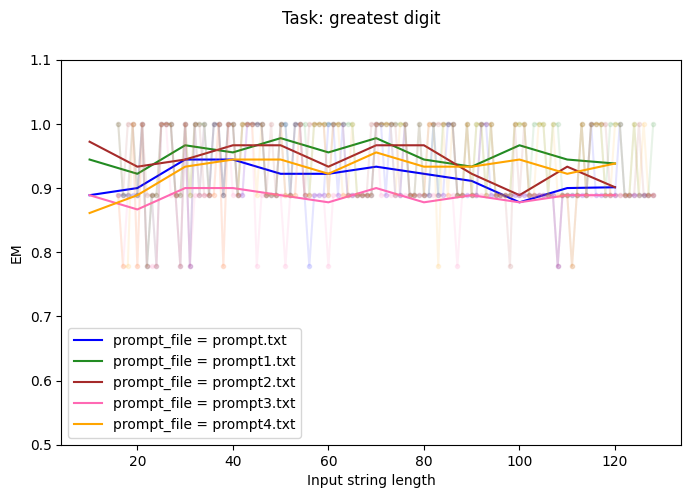

In [46]:
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
color_iter = iter(COLORS)
for label, input_len_to_em in variable_to_em.items():
    color = next(color_iter)
    X1 = sorted(input_len_to_em.keys())
    Y1 = [float(np.mean(input_len_to_em[x])) for x in X1]
    ax1.plot(X1, Y1, ".-", color=color, alpha=0.1)
    X1 = [x*10 for x in range(1, 26)]
    Y1 = [
            float(np.mean(
                [np.mean(input_len_to_em[k]) for k in input_len_to_em if x*10<=k<(1+x)*10]
            ))
            for x in range(1, 26)
    ]
    ax1.plot(X1, Y1, "-", color=color, label=label)
ax1.set_ylim((0.5, 1.1))
ax1.set_ylabel("EM")
ax1.set_xlabel("Input string length")
ax1.legend()

fig.suptitle("Task: greatest digit")
plt.show()

1 [0.55, 0.64, 0.6, 0.52, 0.62, 0.36, 0.54, 0.48, 0.28, 0.26, 0.4, 0.3111111111111111]
2 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
3 [1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
4 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
5 [1.0, 0.8, 0.98, 1.0, 1.0, 1.0, 0.98, 1.0, 0.98, 0.94, 1.0, 1.0]
6 [0.8, 0.98, 1.0, 1.0, 0.94, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
7 [0.95, 0.9, 0.86, 1.0, 0.94, 0.94, 1.0, 1.0, 1.0, 1.0, 0.96, 1.0]
8 [0.9, 0.88, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0]
9 [1.0, 0.92, 1.0, 0.96, 0.98, 1.0, 1.0, 0.88, 1.0, 1.0, 1.0, 0.9111111111111111]


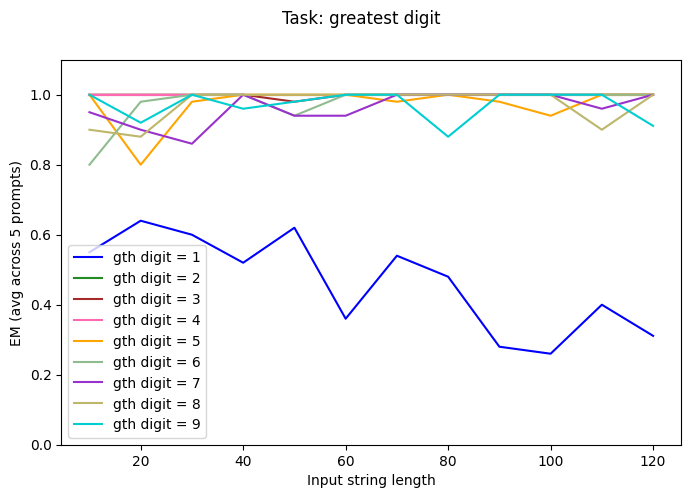

In [24]:

fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
color_iter = iter(COLORS)
X1 = [x*10 for x in range(1, 13)]
for gth in range(1, 10):
    color = next(color_iter)
    mean = []
    std = []
    for x in range(1, 13):
        tmp = []
        for k in sorted(variable_to_em["prompt_file = prompt.txt"].keys()):
            if not x*10<=k<(1+x)*10: continue
            for label in variable_to_em:
                tmp.append(variable_to_em[label][k][gth-1])

        mean.append(np.mean(tmp))
        std.append(np.std(tmp))
    
    print(gth, mean)


    mean = np.array(mean)
    std = np.array(std)
    ax1.plot(X1, mean, "-", color=color, label=f"gth digit = {gth}")
    #ax1.fill_between(X1, mean-std, mean+std ,alpha=0.1, facecolor=color)

ax1.set_ylim((0.0, 1.1))
ax1.set_ylabel("EM (avg across 5 prompts)")
ax1.set_xlabel("Input string length")
ax1.legend()

fig.suptitle("Task: greatest digit")
plt.show()


In [22]:
std

array([0.19595918, 0.17058722, 0.        , 0.23748684, 0.        ,
       0.2845833 ,        nan])